In [4]:
#!pip install wordcloud

In [27]:
import pandas as pd
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS

# import job data

In [11]:
job_data = pd.read_excel("job_data.xlsx")

In [12]:
job_data.head()

,ID,Date,Company,Title,Location,Description,Level,num_Applicant,Type,Job_Link,Company_Link,Function,Industries,Employee_Size
0,2495155469,2021-03-31,Traveloka,Data Scientist,"Jakarta, Jakarta, Indonesia",Given a business problem and requirements from...,Entry level,46 applicants,Full-time,https://id.linkedin.com/jobs/view/data-scienti...,https://id.linkedin.com/company/traveloka-com?...,"Engineering,Information Technology",Internet,"1,001-5,000 employees"
1,2466698262,2021-04-03,QuantumBlack,Data Scientist - QuantumBlack,"Jakarta, Jakarta, Indonesia",Apply Now Qualifications Bachelor or MSc or ...,Executive,42 applicants,Full-time,https://id.linkedin.com/jobs/view/data-scienti...,https://uk.linkedin.com/company/quantumblack?t...,"Consulting,Information Technology,Analyst","Information Technology and Services,Computer S...",201-500 employees
2,2479097487,2021-04-07,Tokopedia,Data Science Lead,"Jakarta, Indonesia",Job Description: Engaging with business teams...,Mid-Senior level,78 applicants,Full-time,https://id.linkedin.com/jobs/view/data-science...,https://id.linkedin.com/company/pt--tokopedia?...,"Analyst,Science",Internet,"1,001-5,000 employees"
3,2479941826,2021-04-08,PT. XL Axiata Tbk,Sr. Data Scientist - CVM,"Jakarta, Indonesia",Roles : Lead the development of predictive cu...,Associate,90 applicants,Full-time,https://id.linkedin.com/jobs/view/sr-data-scie...,https://id.linkedin.com/company/pt.-xl-axiata-...,"Analyst,Marketing,Business Development","Telecommunications,Internet,Computer & Network...","1,001-5,000 employees"
4,2463401542,2021-03-16,FNA,Data Scientist - Remote,"Jakarta, Jakarta, Indonesia",Title: Data Scientist Location: Remotely from...,Executive,112 applicants,Full-time,https://id.linkedin.com/jobs/view/data-scienti...,https://uk.linkedin.com/company/fnalab?trk=pub...,"Engineering,Information Technology","Information Technology and Services,Computer S...",11-50 employees


# write all job description in one textfile

In [21]:
all_jd = " "
with open('readme.txt', 'w',encoding="utf-8") as f:
    for jd in job_data["Description"]:
        f.write(jd)
        f.write('\n')

# read the textfile, and create a wordcloud from it

In [31]:
dataset = open("readme.txt", "r",encoding="utf-8").read()
def create_word_cloud(string):
    maskArray = np.array(Image.open("cloud.png"))
    cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
    cloud.generate(string)
    cloud.to_file("wordCloud.png")


# insight : using this world cloud, we can see in each Job description, there is a high chance that company will use the word "machine learning", "python", or "sql", signifying the importance of these skill as a data scientist.. 

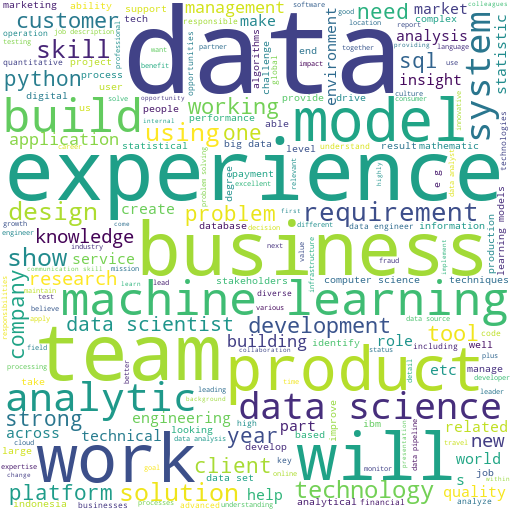

In [32]:
dataset = dataset.lower()
create_word_cloud(dataset)
Image.open("wordCloud.png")

# function to simplify job title name

In [43]:
def simplify_job(job):
    job_lower = job.lower()
    jobname = 'data scientist|data engineer|data analyst'
    all_words = re.findall(jobname, job_lower, flags=re.IGNORECASE)
    if all_words:
        return all_words[0]
    else:
        return job
     

# function to get number of applicant

In [34]:
def catch_number(your_string):
    return int(''.join(filter(str.isdigit, your_string)))

In [35]:
job_data["applicant"]=job_data["num_Applicant"].apply(catch_number)

In [44]:
job_data["Job Title"] = job_data["Title"].apply(simplify_job)

# insight: Based on job count, entry level Data Engineer is the most needed job for this month in Indonesia. 

In [54]:
job_data.groupby(["Job Title","Level"]).agg({'applicant': ['mean'],"Title":["count"]}).sort_values(("Title","count"),ascending=False)

applicant  \
                                                                           mean   
Job Title                                          Level                          
data engineer                                      Entry level        65.142857   
                                                   Mid-Senior level  101.000000   
data scientist                                     Mid-Senior level   73.400000   
                                                   Entry level        36.200000   
                                                   Associate          38.000000   
                                                   Executive          77.000000   
data analyst                                       Entry level        50.500000   
Senior Machine Learning Engineer                   Associate          44.000000   
Artificial Intelligence Researcher                 Entry level        25.000000   
data engineer                                      Not Applicable     55.000000   
Tissue Culture Sr. Researcher                      Mid-Senior level  124.000000   
Sr Executive - Data Science                        Executive          67.000000   
AI Engineer                                        Entry level       151.000000   
Market Researcher                                  Associate          30.000000   
Machine Learning Engineer - Merchant Platform      Entry level       120.000000   
Junior Researcher (6-Month Contract)               Entry level        81.000000   
IBM Services Associate: Developer (Graduates Pr... Not Applicable     37.000000   
Head of Data Science                               Mid-Senior level  200.000000   
Data Science Manager (Bangkok based)               Director           25.000000   
Data Science Manager                               Mid-Senior level   25.000000   
Data Science Lead                                  Mid-Senior level   78.000000   
Data Science Graduate Program                      Associate         200.000000   
Data Science Consultant                            Mid-Senior level   32.000000   
Senior Analytics Specialist                        Associate          25.000000   

                                                                    Title  
                                                                    count  
Job Title                                          Level                   
data engineer                                      Entry level          7  
                                                   Mid-Senior level     6  
data scientist                                     Mid-Senior level     5  
                                                   Entry level          5  
                                                   Associate            5  
                                                   Executive            2  
data analyst                                       Entry level          2  
Senior Machine Learning Engineer                   Associate            2  
Artificial Intelligence Researcher                 Entry level          1  
data engineer                                      Not Applicable       1  
Tissue Culture Sr. Researcher                      Mid-Senior level     1  
Sr Executive - Data Science                        Executive            1  
AI Engineer                                        Entry level          1  
Market Researcher                                  Associate            1  
Machine Learning Engineer - Merchant Platform      Entry level          1  
Junior Researcher (6-Month Contract)               Entry level          1  
IBM Services Associate: Developer (Graduates Pr... Not Applicable       1  
Head of Data Science                               Mid-Senior level     1  
Data Science Manager (Bangkok based)               Director             1  
Data Science Manager                               Mid-Senior level     1  
Data Science Lead                                  Mid-Senior level     1  
Data